In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data/hr_analytics/HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'})

In [6]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
front=df['turnover']
df.drop(labels=['turnover'],axis=1,inplace=True)
df.insert(0,'turnover',front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [8]:
df.shape

(14999, 10)

In [9]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [10]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
turnover_rate=df.turnover.value_counts()/14999

In [12]:
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [13]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [19]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [20]:
turnover_Summary=df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [21]:
salary_Summary=df.groupby('salary')
salary_Summary.mean()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
salary,,,,,,,,
high,0.066289,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.058205
low,0.296884,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.009021
medium,0.204313,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.028079


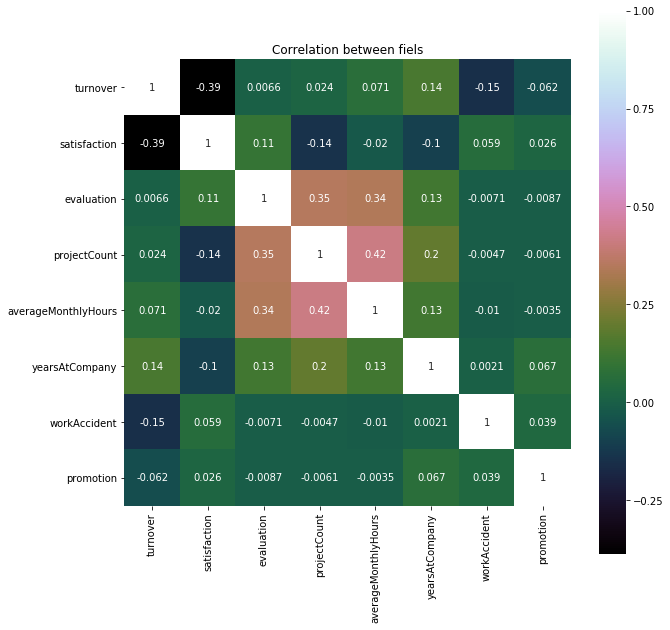

In [27]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between fiels')

In [28]:
emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.612833522235
The mean for the employees that had a turnover is: 0.440098011761


In [29]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-39.10948894348423, pvalue=9.0127811954355001e-279)

In [30]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.9606285216
The t-distribution right quartile range is: 1.9606285216


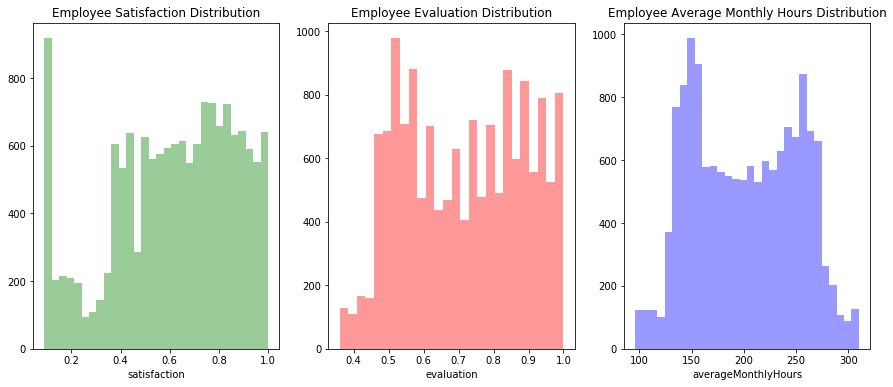

In [31]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')

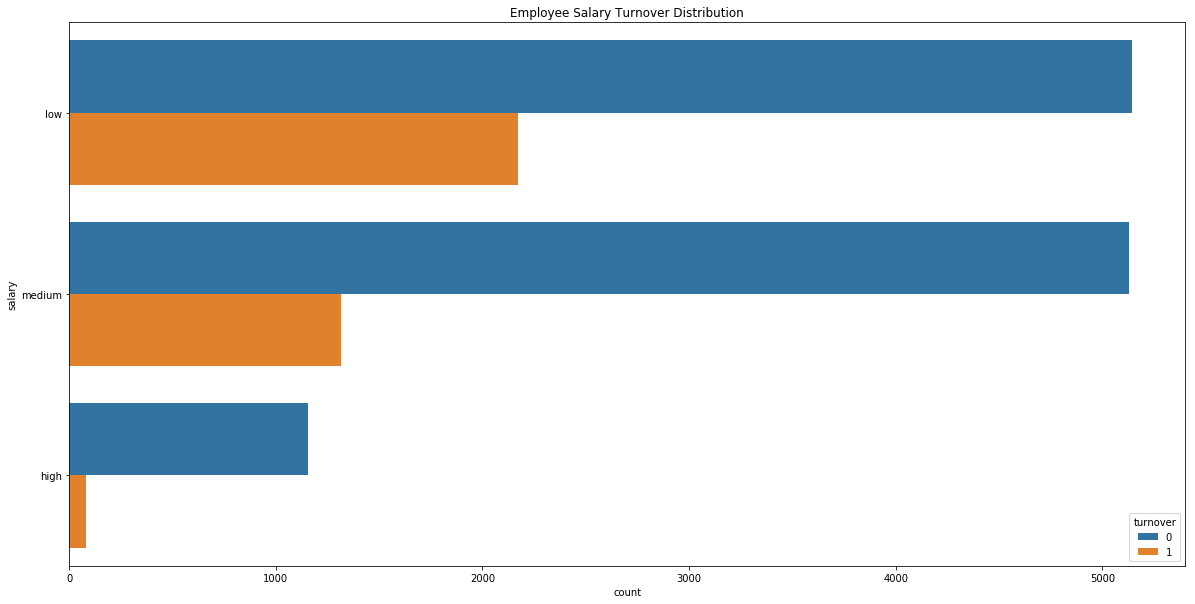

In [38]:
f,ax = plt.subplots(figsize=(20,10))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

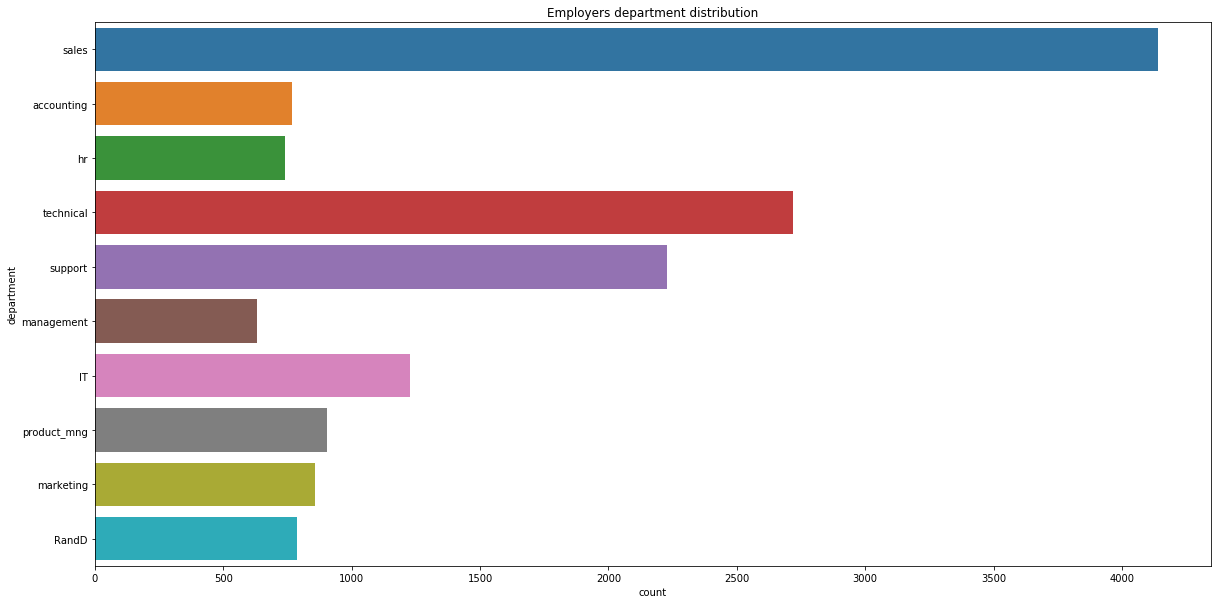

In [41]:
f,ax=plt.subplots(figsize=(20,10))
sns.countplot(y='department',data=df).set_title('Employers department distribution')

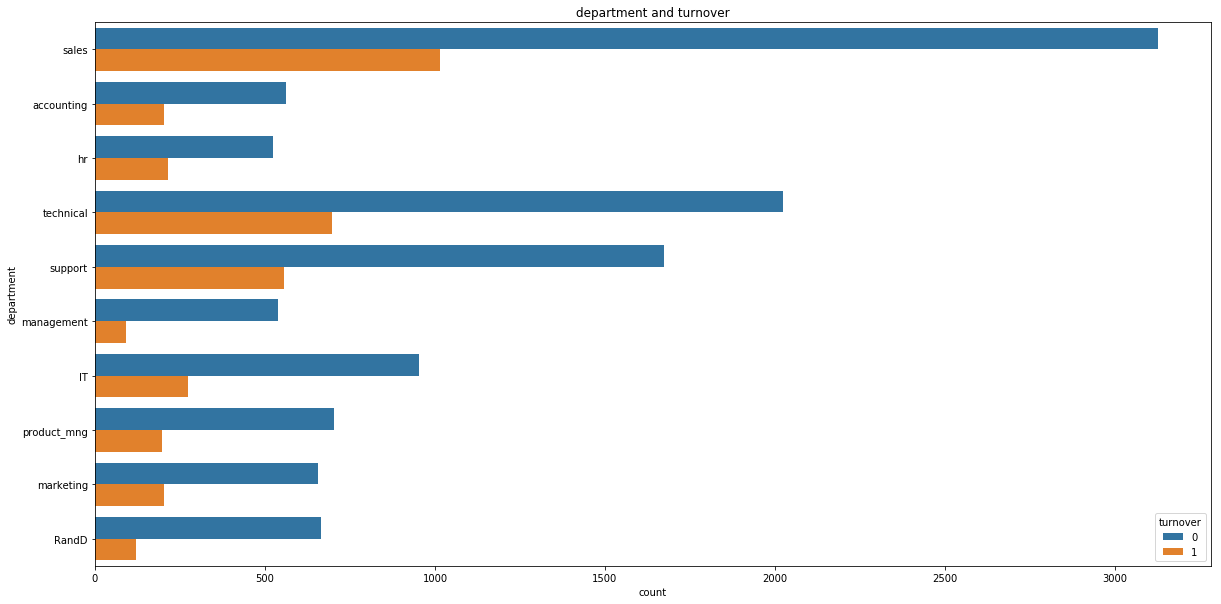

In [43]:
f, ax = plt.subplots(figsize=(20,10))
sns.countplot(y='department',hue='turnover',data=df).set_title('department and turnover')

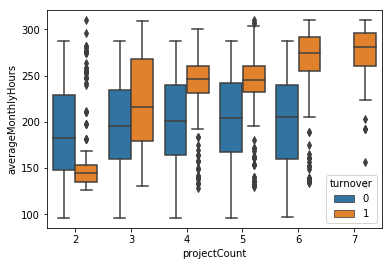

In [44]:
import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

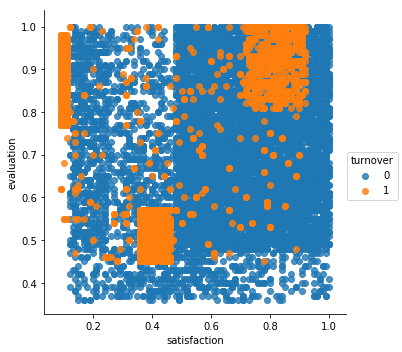

In [46]:
sns.lmplot(x='satisfaction',y='evaluation', fit_reg=False,data=df,hue='turnover')

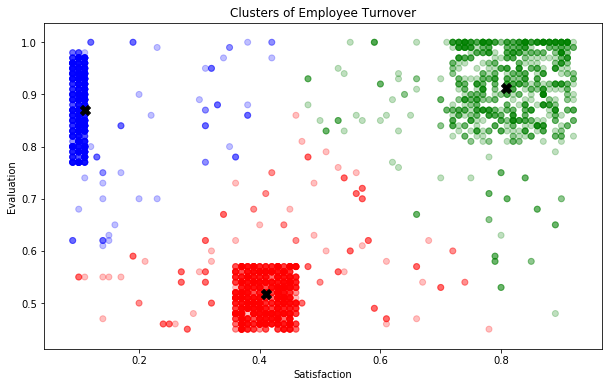

In [49]:
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

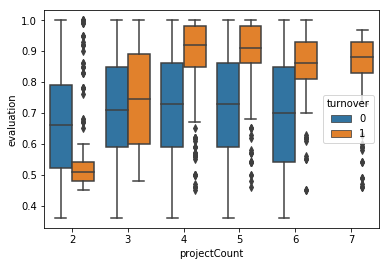

In [50]:
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

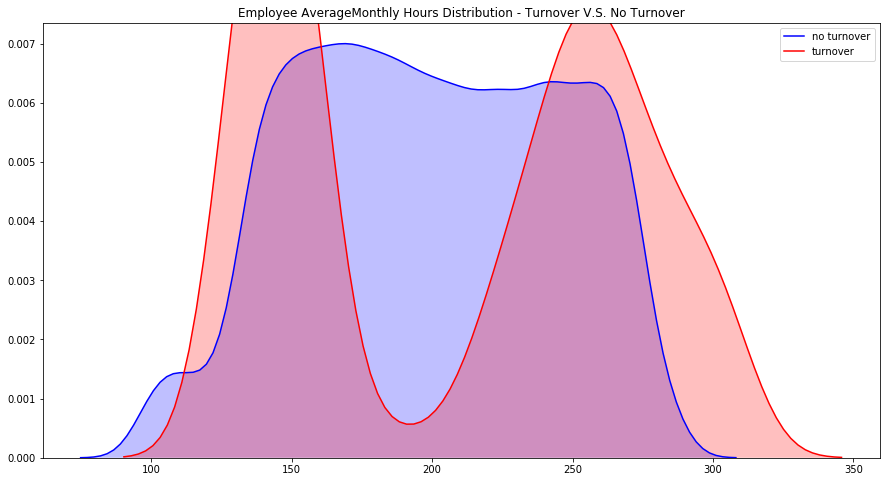

In [52]:
fig = plt.figure(figsize=(15,8))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

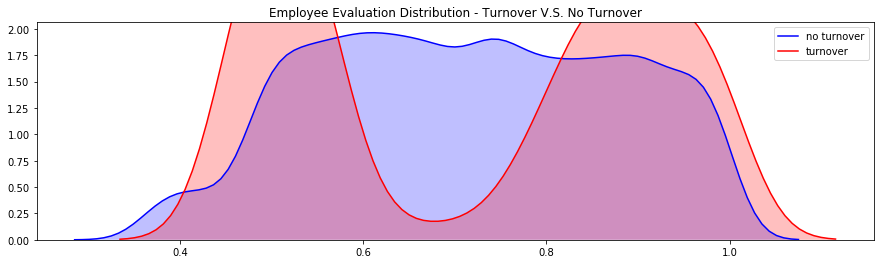

In [53]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')